Experiment 5+ : You will conduct several more experiments. (a) Redo all the 4 experiments with some regularization technique. (b) Create more experiments on your own by tweaking architectures and/or hyper parameters.

Result1:  Create a table with the accuracy and loss for train/test/validation & process time for ALL the models.

Result2: Take Experiment 3 – Extract the outputs from 2 filters from the 2 max pooling layers and visualize them in a grid as images. See whether the ‘lighted’ up regions correspond to some features in the original images.

[reference](https://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html)

In [2]:
import numpy as np
import pandas as pd
from packaging import version

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers

import time

In [3]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [4]:
#from google.colab import drive
#drive.mount('/content/gdrive')

**Functions**

In [5]:
import sys
assert sys.version_info >= (3, 7)
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

In [6]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

**Data**

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog'
,'horse'
,'ship'
,'truck']

In [9]:
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train
                                                                              ,y_train
                                                                              ,test_size=.1
                                                                              ,random_state=42
                                                                              ,shuffle=True)

In [10]:
x_train_norm = x_train_split/255
x_valid_norm = x_valid_split/255
x_test_norm = x_test/255

Experiment 5+ : You will conduct several more experiments. (a) Redo all the 4 experiments with some regularization technique. (b) Create more experiments on your own by tweaking architectures and/or hyper parameters.


Experiment 11 CNN with 2 convolution/max pooling layers with L1

In [11]:



model_11 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:],kernel_regularizer=regularizers.l1(0.0001)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
    MaxPooling2D((2, 2)),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_11.summary()

t0 = time.time()
history = model_11.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,479,818 (5.65 MB)

 Trainable params: 1,479,818 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 22/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1293 - loss: 4.0162

I0000 00:00:1713888079.918001      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713888079.936402      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3602 - loss: 2.2097

W0000 00:00:1713888086.992392      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713888088.036231      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.3603 - loss: 2.2091 - val_accuracy: 0.4880 - val_loss: 1.6288
Epoch 2/20
 14/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4898 - loss: 1.6691

W0000 00:00:1713888088.844926      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5402 - loss: 1.5231 - val_accuracy: 0.5798 - val_loss: 1.4123
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5996 - loss: 1.3641 - val_accuracy: 0.5684 - val_loss: 1.4290
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6303 - loss: 1.2849 - val_accuracy: 0.6258 - val_loss: 1.2716
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6500 - loss: 1.2331 - val_accuracy: 0.6164 - val_loss: 1.3192
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6627 - loss: 1.2076 - val_accuracy: 0.6348 - val_loss: 1.2506
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6787 - loss: 1.1568 - val_accuracy: 0.6590 - val_loss: 1.2030
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6948 - loss: 1.1206 - val_accuracy: 0.6756 - val_loss: 1.1778
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7044 - loss: 1.1043 - val_accuracy: 0.6632 - val_

In [13]:
pred = model_11.evaluate(x_test_norm, y_test)
list11= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 72/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 1.2032

W0000 00:00:1713888285.263580      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6985 - loss: 1.1992
Test acc: 0.692


W0000 00:00:1713888286.780664      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


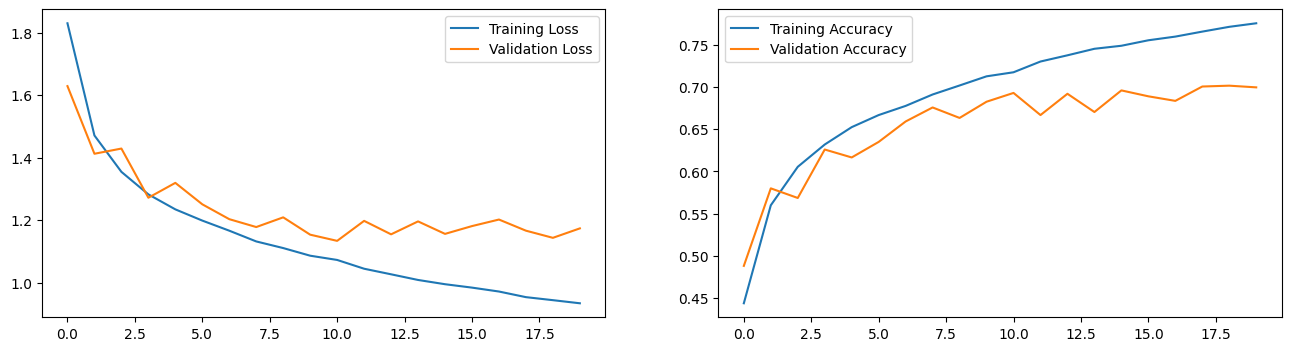

In [14]:
plot_history(history)

Experiment 12 CNN with 2 convolution/max pooling layers with L2

In [15]:
model_12 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:],kernel_regularizer=regularizers.l2(0.0001)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    MaxPooling2D((2, 2)),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_12.summary()

t0 = time.time()
history = model_12.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,479,818 (5.65 MB)

 Trainable params: 1,479,818 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 16/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1175 - loss: 2.3703

W0000 00:00:1713888301.752949      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3715 - loss: 1.7461

W0000 00:00:1713888308.167900      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713888309.197504      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3717 - loss: 1.7458 - val_accuracy: 0.5424 - val_loss: 1.3114
Epoch 2/20
 15/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5730 - loss: 1.2703

W0000 00:00:1713888310.009374      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5871 - loss: 1.2049 - val_accuracy: 0.5792 - val_loss: 1.2461
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6592 - loss: 1.0305 - val_accuracy: 0.6540 - val_loss: 1.0493
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6956 - loss: 0.9340 - val_accuracy: 0.6364 - val_loss: 1.0662
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7234 - loss: 0.8645 - val_accuracy: 0.6724 - val_loss: 1.0190
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7478 - loss: 0.8071 - val_accuracy: 0.7004 - val_loss: 0.9574
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7760 - loss: 0.7421 - val_accuracy: 0.7054 - val_loss: 0.9383
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7924 - loss: 0.6921 - val_accuracy: 0.7088 - val_loss: 0.9763
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8038 - loss: 0.6634 - val_accuracy: 0.7014 - val_

In [17]:
pred = model_12.evaluate(x_test_norm, y_test)
list12= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7062 - loss: 1.3784
Test acc: 0.702


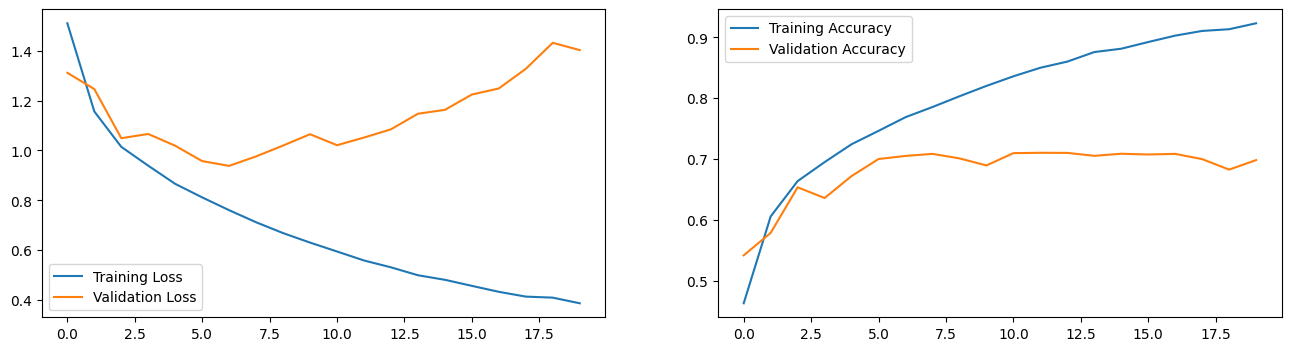

In [18]:
plot_history(history)

Experiment 13 CNN with 2 convolution/max pooling layers with dropouts

In [19]:
model_13 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_13.summary()

t0 = time.time()
history = model_13.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,479,818 (5.65 MB)

 Trainable params: 1,479,818 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 16/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1011 - loss: 2.3565 

W0000 00:00:1713888485.932784      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3150 - loss: 1.8529

W0000 00:00:1713888495.304943      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713888496.175593      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.3152 - loss: 1.8526 - val_accuracy: 0.5622 - val_loss: 1.2540
Epoch 2/20
 22/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5485 - loss: 1.3060

W0000 00:00:1713888496.824991      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5360 - loss: 1.3060 - val_accuracy: 0.6186 - val_loss: 1.0819
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5901 - loss: 1.1659 - val_accuracy: 0.6374 - val_loss: 1.0147
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6245 - loss: 1.0685 - val_accuracy: 0.6654 - val_loss: 0.9470
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6445 - loss: 1.0080 - val_accuracy: 0.6822 - val_loss: 0.9261
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6644 - loss: 0.9501 - val_accuracy: 0.6930 - val_loss: 0.8702
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6816 - loss: 0.9083 - val_accuracy: 0.6980 - val_loss: 0.8571
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6947 - loss: 0.8676 - val_accuracy: 0.7046 - val_loss: 0.8498
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7014 - loss: 0.8459 - val_accuracy: 0.7076 - val_

In [20]:
pred = model_13.evaluate(x_test_norm, y_test)
list13= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 58/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.7495

W0000 00:00:1713890187.945793      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7434 - loss: 0.7704
Test acc: 0.740


W0000 00:00:1713890189.176857      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


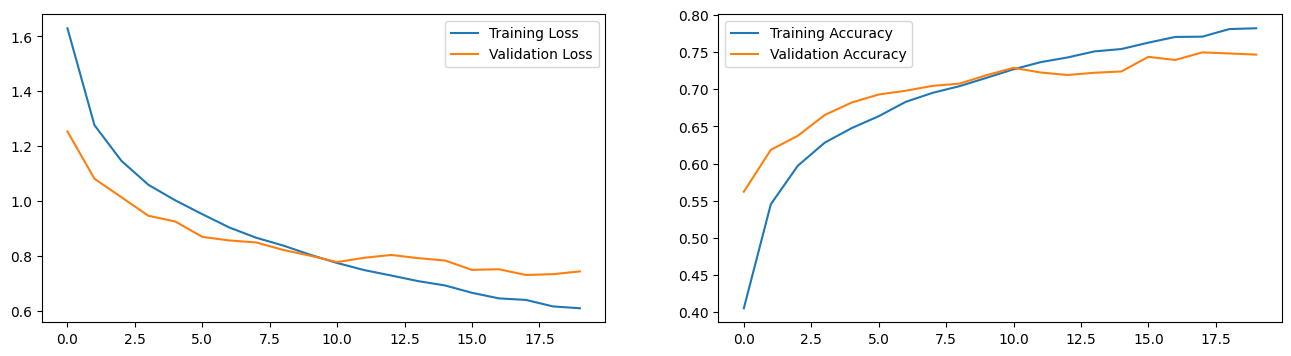

In [21]:
plot_history(history)

Experiment 14 with 3 convolution/max pooling layers L1

In [22]:
model_14 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:],kernel_regularizer=regularizers.l1(0.0001)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    MaxPooling2D((2, 2)),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_14.summary()

t0 = time.time()
history = model_14.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,742,474 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 19/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0856 - loss: 4.8752

W0000 00:00:1713890204.167313      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2495 - loss: 2.4859

W0000 00:00:1713890212.890215      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713890214.071749      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2496 - loss: 2.4853 - val_accuracy: 0.4022 - val_loss: 1.8132
Epoch 2/20
 16/704 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4042 - loss: 1.7748

W0000 00:00:1713890215.099706      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4567 - loss: 1.6573 - val_accuracy: 0.5368 - val_loss: 1.4708
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5319 - loss: 1.4772 - val_accuracy: 0.5686 - val_loss: 1.3579
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5865 - loss: 1.3497 - val_accuracy: 0.5756 - val_loss: 1.3613
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6124 - loss: 1.2930 - val_accuracy: 0.6180 - val_loss: 1.2688
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6387 - loss: 1.2330 - val_accuracy: 0.6304 - val_loss: 1.2598
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6570 - loss: 1.1871 - val_accuracy: 0.6532 - val_loss: 1.2008
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6722 - loss: 1.1369 - val_accuracy: 0.6472 - val_loss: 1.2108
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6805 - loss: 1.1227 - val_accuracy: 0.672

In [23]:
pred = model_14.evaluate(x_test_norm, y_test)
list14= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 62/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 1.1022

W0000 00:00:1713890357.555810      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7031 - loss: 1.1167
Test acc: 0.706


W0000 00:00:1713890359.179595      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


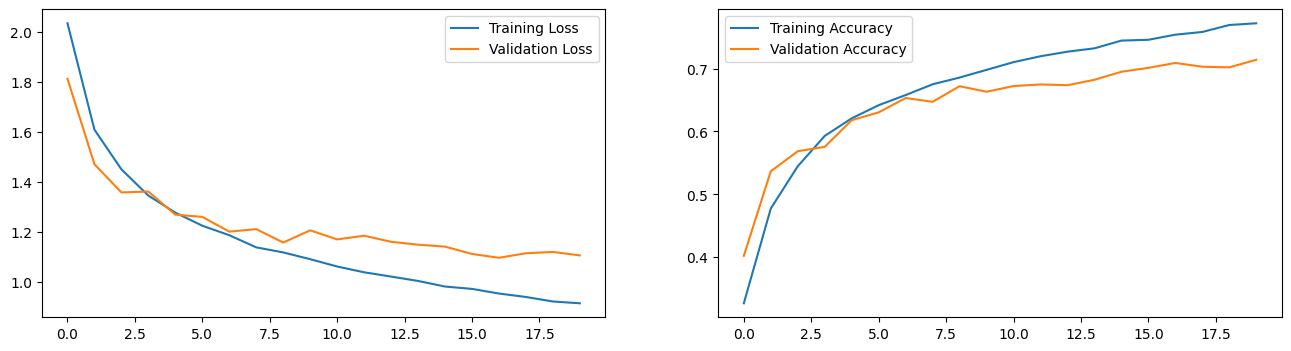

In [24]:
plot_history(history)

E15 CNN with 3 convolution/max pooling layers *L2*

In [25]:
model_15 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:],kernel_regularizer=regularizers.l2(0.0001)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_15.summary()

t0 = time.time()
history = model_15.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,742,474 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 13/704 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1009 - loss: 2.3875

W0000 00:00:1713890382.494725      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3199 - loss: 1.8763

W0000 00:00:1713890394.149826      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713890395.261636      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.3200 - loss: 1.8760 - val_accuracy: 0.5338 - val_loss: 1.3407
Epoch 2/20
 12/704 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5655 - loss: 1.3014

W0000 00:00:1713890396.202071      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5514 - loss: 1.3166 - val_accuracy: 0.6226 - val_loss: 1.1426
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6237 - loss: 1.1531 - val_accuracy: 0.6560 - val_loss: 1.0639
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6688 - loss: 1.0565 - val_accuracy: 0.6764 - val_loss: 1.0693
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6938 - loss: 1.0095 - val_accuracy: 0.7116 - val_loss: 0.9741
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7094 - loss: 0.9744 - val_accuracy: 0.7274 - val_loss: 0.9339
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7330 - loss: 0.9256 - val_accuracy: 0.7404 - val_loss: 0.9162
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7434 - loss: 0.9050 - val_accuracy: 0.7630 - val_loss: 0.8794
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7519 - loss: 0.8989 - val_accuracy: 0.758

In [26]:
pred = model_15.evaluate(x_test_norm, y_test)
list15= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 49/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.8838

W0000 00:00:1713890580.218599      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7806 - loss: 0.9060
Test acc: 0.779


W0000 00:00:1713890581.717092      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


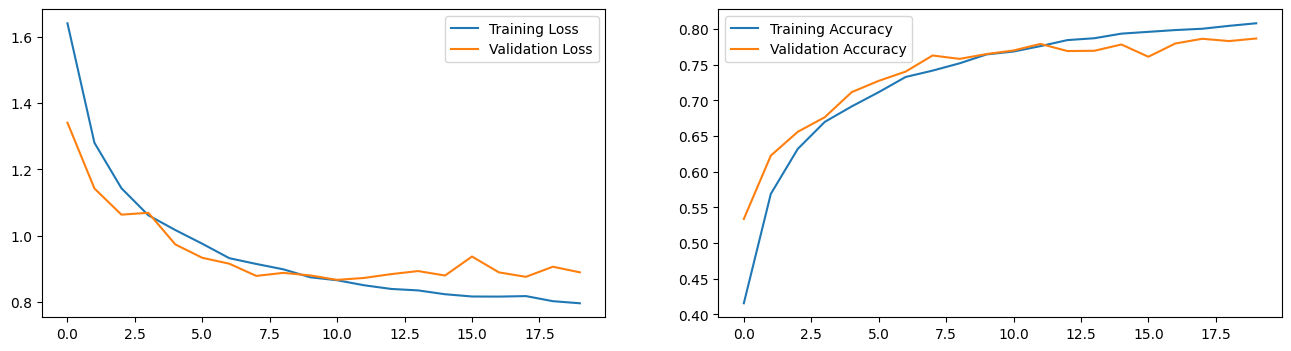

In [27]:
plot_history(history)

E16 CNN with 3 convolution/max pooling layers dropout

In [28]:
model_16 = Sequential([
    # First convolutional layer
    Conv2D(128, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second convolutional layer
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model_16.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_16.summary()

t0 = time.time()
history = model_16.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,742,474 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
 13/704 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1002 - loss: 2.3474 

W0000 00:00:1713890597.816973      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2855 - loss: 1.9081

W0000 00:00:1713890610.774543      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713890611.683278      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.2857 - loss: 1.9078 - val_accuracy: 0.5312 - val_loss: 1.3096
Epoch 2/20
 11/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4794 - loss: 1.4363

W0000 00:00:1713890612.429544      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5257 - loss: 1.3311 - val_accuracy: 0.6062 - val_loss: 1.0888
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5990 - loss: 1.1495 - val_accuracy: 0.6462 - val_loss: 0.9927
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6382 - loss: 1.0362 - val_accuracy: 0.6878 - val_loss: 0.9191
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6668 - loss: 0.9567 - val_accuracy: 0.6710 - val_loss: 0.9258
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6936 - loss: 0.8845 - val_accuracy: 0.7206 - val_loss: 0.7845
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7106 - loss: 0.8300 - val_accuracy: 0.7238 - val_loss: 0.7790
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7214 - loss: 0.7927 - val_accuracy: 0.7458 - val_loss: 0.7175
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7384 - loss: 0.7565 - val_accuracy: 0.739

In [29]:
pred = model_16.evaluate(x_test_norm, y_test)
list16= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 50/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.6431

W0000 00:00:1713890765.151823      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7805 - loss: 0.6572
Test acc: 0.778


W0000 00:00:1713890766.430152      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


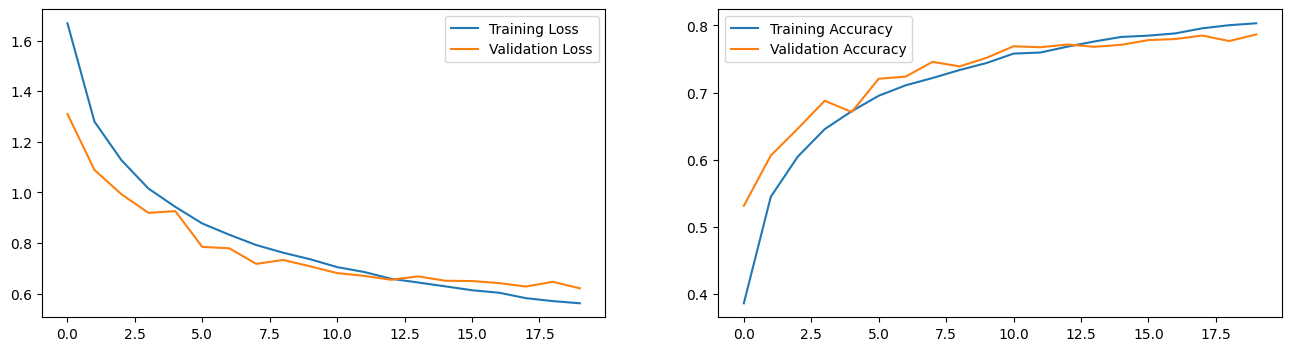

In [30]:
plot_history(history)

Model 17 "My own model":

In [35]:
model_17 = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3), activation='relu', input_shape=x_train_norm.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Second convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Flatten layer to convert 2D feature maps to a 1D feature vector
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model_17.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model_17.summary()

t0 = time.time()
history = model_17.fit(x_train_norm
                    ,y_train_split
                    ,epochs=10
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 510,922 (1.95 MB)

 Trainable params: 510,922 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 24/704 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0829 - loss: 2.3063

W0000 00:00:1713890984.600937      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2802 - loss: 1.9193

W0000 00:00:1713890994.953052      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2804 - loss: 1.9190 - val_accuracy: 0.5198 - val_loss: 1.3342
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5209 - loss: 1.3346 - val_accuracy: 0.6146 - val_loss: 1.0732
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6045 - loss: 1.1281 - val_accuracy: 0.6542 - val_loss: 0.9816
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6462 - loss: 1.0100 - val_accuracy: 0.6770 - val_loss: 0.9073
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6837 - loss: 0.9088 - val_accuracy: 0.7168 - val_loss: 0.8100
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7055 - loss: 0.8498 - val_accuracy: 0.7140 - val_loss: 0.8311
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7234 - loss: 0.8058 - val_accuracy: 0.7360 - val_loss: 0.7605
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7382 - loss: 0.7511 - val_accuracy: 0.7388 - va

In [36]:
pred = model_17.evaluate(x_test_norm, y_test)
list17= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

 69/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7445 - loss: 0.7192

W0000 00:00:1713891032.995011      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7425 - loss: 0.7504
Test acc: 0.743


W0000 00:00:1713891033.971535      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


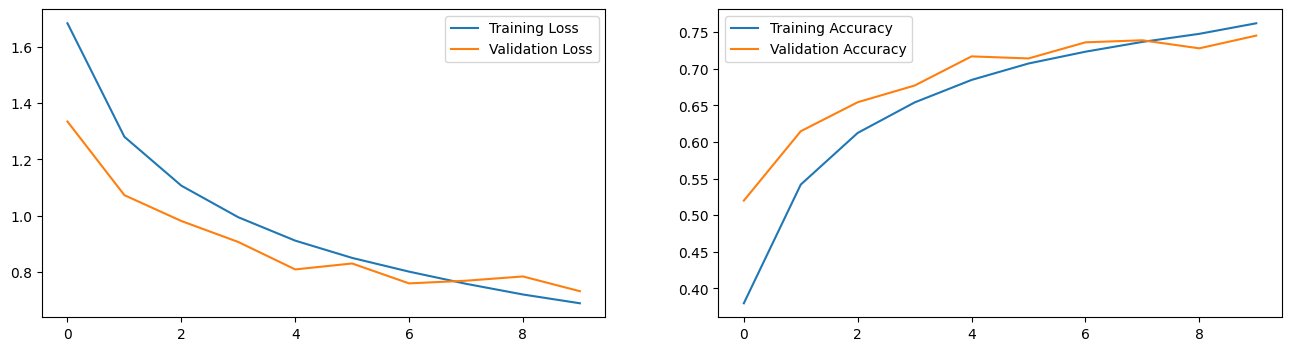

In [37]:
plot_history(history)

Results:

In [39]:
results = [list11, list12, list13,list14,list15, list16,list17]
columns = ['training_accuracy','training_loss','val_accuracy','val_loss','testing_loss','testing_accuracy','training_time']
row_names = ['experiment11','experiment12','experiment13','experiment14','experiment15','experiment16','experiment17']

# Create the DataFrame
results_df = pd.DataFrame(results, columns=columns,index = row_names)
results_df

,training_accuracy,training_loss,val_accuracy,val_loss,testing_loss,testing_accuracy,training_time
experiment11,0.775289,0.933865,0.6994,1.173526,1.201202,0.6922,122.244983
experiment12,0.923000,0.387341,0.6986,1.402547,1.427324,0.7024,113.827961
experiment13,0.782022,0.610136,0.7466,0.744388,0.774328,0.7400,126.064022
experiment14,0.772089,0.913682,0.7140,1.105460,1.118847,0.7061,149.613005
experiment15,0.808133,0.796987,0.7868,0.890125,0.909990,0.7786,156.422059
experiment16,0.803289,0.561749,0.7866,0.620833,0.663494,0.7784,153.832628
experiment17,0.762022,0.690002,0.7452,0.732822,0.755483,0.7430,52.121306


In [40]:
results_df.to_excel("results3.xlsx")

In [ ]:
'''
%%shell
jupyter nbconvert --to html /content/Experiment5+_HW_2.ipynb
'''